In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
stock="AMZN"
start_date="2023-01-01"
end_date="2023-05-31"

data=yf.download(stock,start=start_date,end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
import pandas as pd
data_cleaned=data.dropna()
data_cleaned=data_cleaned.reset_index()
data_cleaned=data_cleaned.rename(columns={"Open": "Open Price",
                                          "High": "High Price",
                                          "Low": "Low Price",
                                          "Close": "Closing Price",
                                          "Volume": "Trading Volume"})


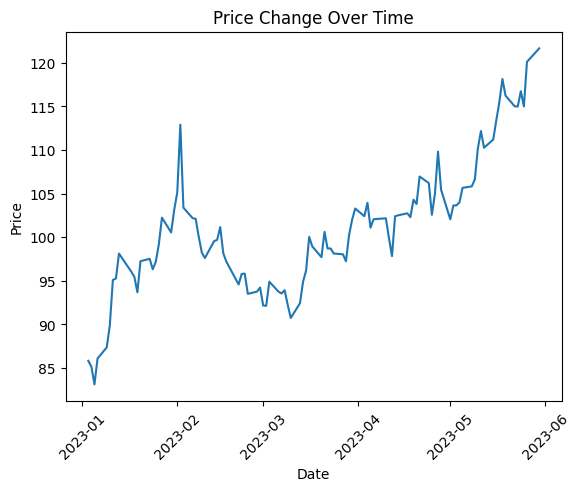

In [ ]:
import matplotlib.pyplot as plt
plt.plot(data_cleaned['Date'],data_cleaned['Closing Price'])
plt.title('Price Change Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

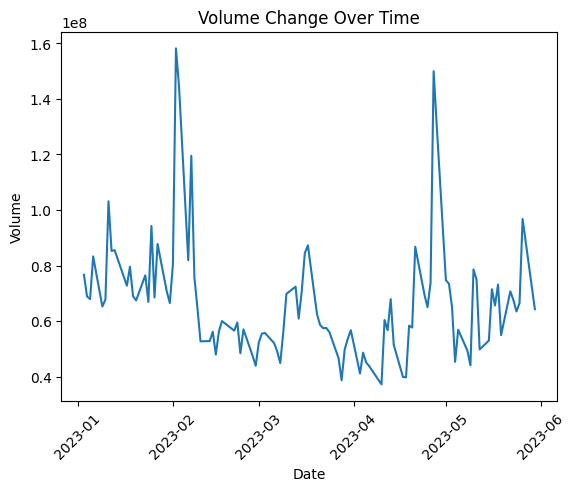

In [ ]:

plt.plot(data_cleaned['Date'],data_cleaned['Trading Volume'])
plt.title('Volume Change Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.show()

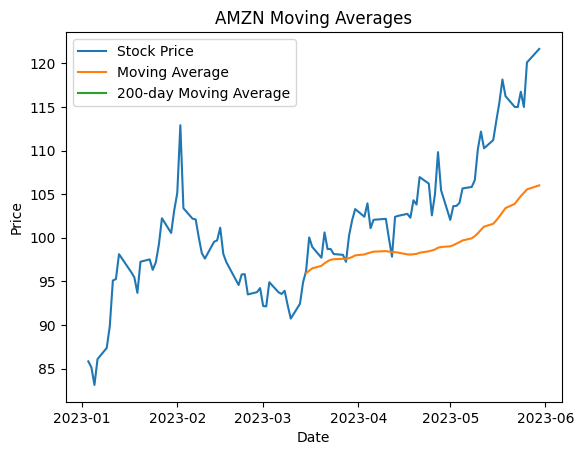

In [ ]:
data['MA_50']=data['Close'].rolling(window=50).mean()
data['MA_200']=data['Close'].rolling(window=200).mean()
plt.plot(data.index,data['Close'],label='Stock Price')
plt.plot(data.index,data['MA_50'],label='Moving Average')
plt.plot(data.index,data['MA_200'],label='200-day Moving Average')
plt.title(f'{stock} Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
data['Daily Return']=data['Close'].pct_change()
avg_return=data['Daily Return'].mean()
print("Average Daily Return:",avg_return)

Average Daily Return: 0.0037298142144421786


In [ ]:
data['Daily Return']=data['Close'].pct_change()
data['Trend']=['Positive' if x > 0 else 'Negative' for x in data['Daily Return']]
print(data)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03   85.459999   86.959999   84.209999   85.820000   85.820000   
2023-01-04   86.550003   86.980003   83.360001   85.139999   85.139999   
2023-01-05   85.330002   85.419998   83.070000   83.120003   83.120003   
2023-01-06   83.029999   86.400002   81.430000   86.080002   86.080002   
2023-01-09   87.459999   89.480003   87.080002   87.360001   87.360001   
...                ...         ...         ...         ...         ...   
2023-05-23  114.269997  117.139999  113.779999  114.989998  114.989998   
2023-05-24  115.349998  117.339996  115.019997  116.750000  116.750000   
2023-05-25  116.629997  116.870003  114.309998  115.000000  115.000000   
2023-05-26  116.040001  121.500000  116.019997  120.110001  120.110001   
2023-05-30  122.370003  122.919998  119.860001  121.660004  121.660004   

              Volume     MA_50  MA_20

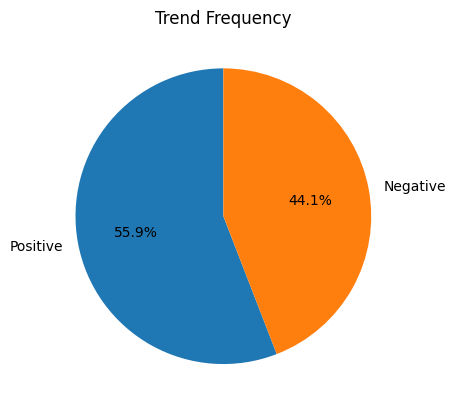

In [ ]:
trend_count=data['Trend'].value_counts()
plt.pie(trend_count,labels=trend_count.index,autopct='%1.1f%%',startangle=90)
plt.title('Trend Frequency')
plt.show()

In [ ]:
stock2="GOOGL"
stock_data=yf.download(stock2,start=start_date,end=end_date)
stock_data['Daily Return']=stock_data['Close'].pct_change()
merged_data=pd.concat([data['Daily Return'],stock_data['Daily Return']],axis=1)
correlation=merged_data.corr().iloc[0, 1]
print("Correlation:",correlation)

[*********************100%%**********************]  1 of 1 completed

Correlation: 0.6150826153092996
